# EDA

### Cargamos las librerías necesarias

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import missingno as msno
import warnings

# Configurar seaborn para un estilo bonito
sns.set_theme(style="whitegrid")

## Cargamos el dataset

In [8]:
file_path = '../datasets/fetal_health.csv'
df = pd.read_csv(file_path)

### Análisis Descriptivo y Calidad del Dato
Estructura: El dataset tiene 2126 filas y 22 columnas.

Tipos de Datos: Todas las columnas son numéricas (float64), lo cual es perfecto para el análisis.

Valores Faltantes: ¡Buenas noticias! No hay ningún valor faltante en el dataset.

Filas Duplicadas: Se han encontrado 13 filas duplicadas. Es una buena práctica eliminarlas para evitar sesgos en el análisis. Lo haré en el siguiente paso.

Variable Objetivo (fetal_health): Esta es la variable que probablemente queremos predecir. Tiene 3 valores únicos:

    1.0 (Normal): 1655 instancias

    2.0 (Sospechoso): 295 instancias

    3.0 (Patológico): 176 instancias

    Conclusión clave: Este es un dataset desbalanceado. La clase 'Normal' (1.0) es mucho más común que las otras dos, lo cual es muy importante tener en cuenta.

Escalas: Las estadísticas descriptivas (df.describe()) muestran que las variables tienen rangos y escalas muy diferentes (p. ej., baseline value tiene una media de 133, mientras que accelerations tiene una media de 0.003).

In [11]:
print("--- Información General ----")
df.info()

--- Información General ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_valu

In [12]:
print("\n--- Primeras 5 filas ---")
df.head()


--- Primeras 5 filas ---


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [13]:
print("\n--- Conteo de Valores Faltantes ---")
df.isnull().sum()


--- Conteo de Valores Faltantes ---


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [16]:
print("\n--- Conteo de Filas Duplicadas ---")
print(f"Total de filas duplicadas: {df.duplicated().sum()}")


--- Conteo de Filas Duplicadas ---
Total de filas duplicadas: 13


In [17]:
print("\n--- Estadísticas Descriptivas ---")
df.describe()


--- Estadísticas Descriptivas ---


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [19]:
# Es importante entender la variable onjetivo
print(df['fetal_health'].value_counts())

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


### Análisis Univariante y Outliers
Eliminar las 13 filas duplicadas que encontramos.

Visualizar la distribución de la variable objetivo fetal_health (el desbalance) con un gráfico de barras.

Generar histogramas para todas las demás características para entender sus distribuciones individuales.

Crear diagramas de caja (box plots) para todas las características. Esta es la técnica estándar para la detección visual de outliers (valores atípicos).

In [20]:
# --- Pre-procesamiento: Eliminar duplicados ---
duplicados_antes = df.duplicated().sum()
if duplicados_antes > 0:
    df = df.drop_duplicates(keep='first')
    print(f"Se eliminaron {duplicados_antes} filas duplicadas. Nuevo shape: {df.shape}")
else:
    print("No se encontraron filas duplicadas.")

Se eliminaron 13 filas duplicadas. Nuevo shape: (2113, 22)


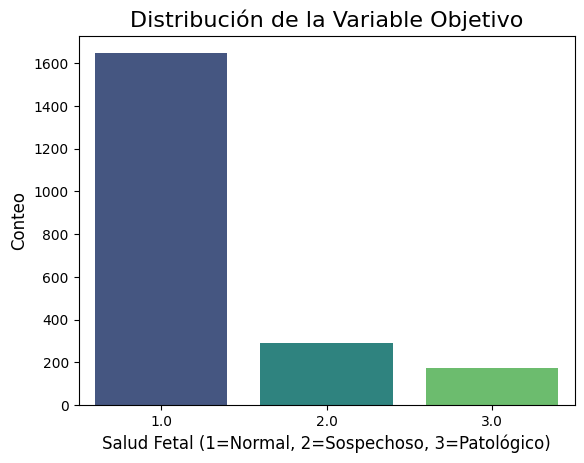

In [26]:
# --- Visualización de la variable objetivo (desbalance)
df_limpio = df.drop_duplicates(keep='first').copy()
plt.Figure(figsize=(8, 5))
df_limpio['fetal_health'] = df_limpio['fetal_health'].astype('category')
sns.countplot(
    x='fetal_health',
    data=df_limpio,
    palette='viridis',
    hue='fetal_health',
    legend=False
)

plt.title('Distribución de la Variable Objetivo', fontsize=16)
plt.xlabel('Salud Fetal (1=Normal, 2=Sospechoso, 3=Patológico)', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.savefig('fetal_health_distribution.png', bbox_inches='tight')

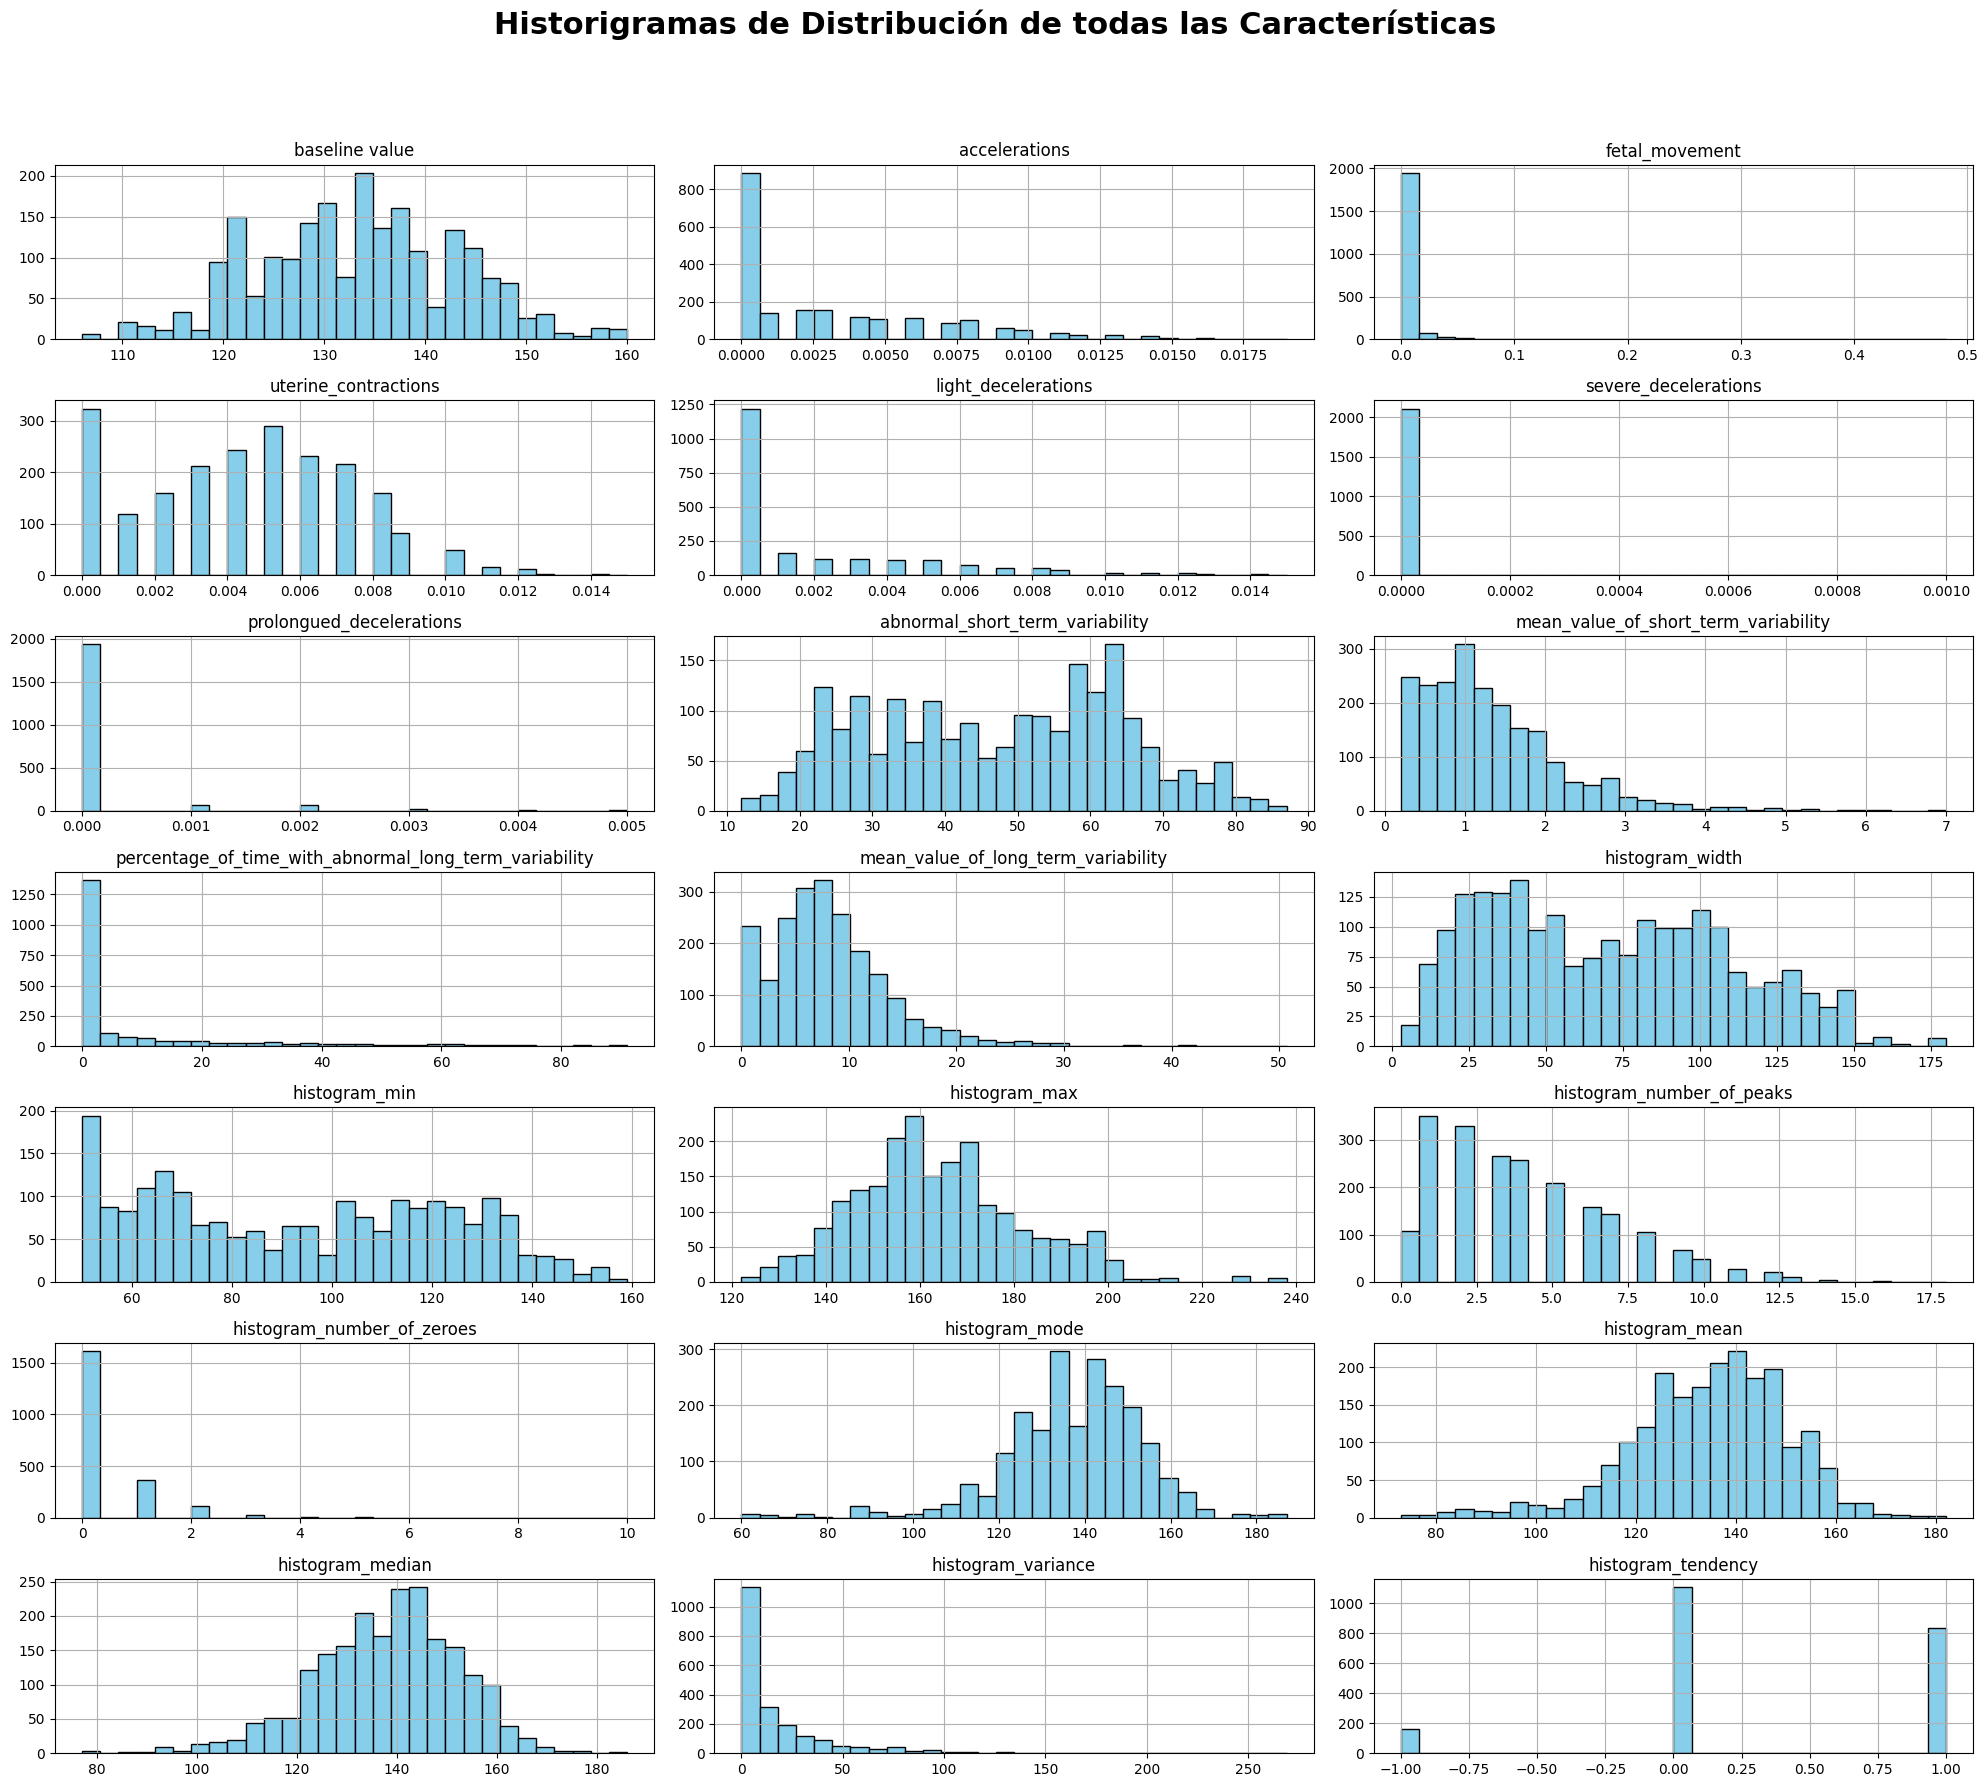

In [27]:
#--- Historigramas de todas las características (Análisis Univariante)
    # Separar características de la variable objetivo
features = df.drop('fetal_health', axis=1)

features.hist(figsize=(20, 18), bins=30, layout=(7, 3), color='skyblue', edgecolor='black')
plt.suptitle('Historigramas de Distribución de todas las Características', y=1.02, size=22, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Ajustar para el supertítulo
plt.savefig('feature_histograms.png', bbox_inches='tight')

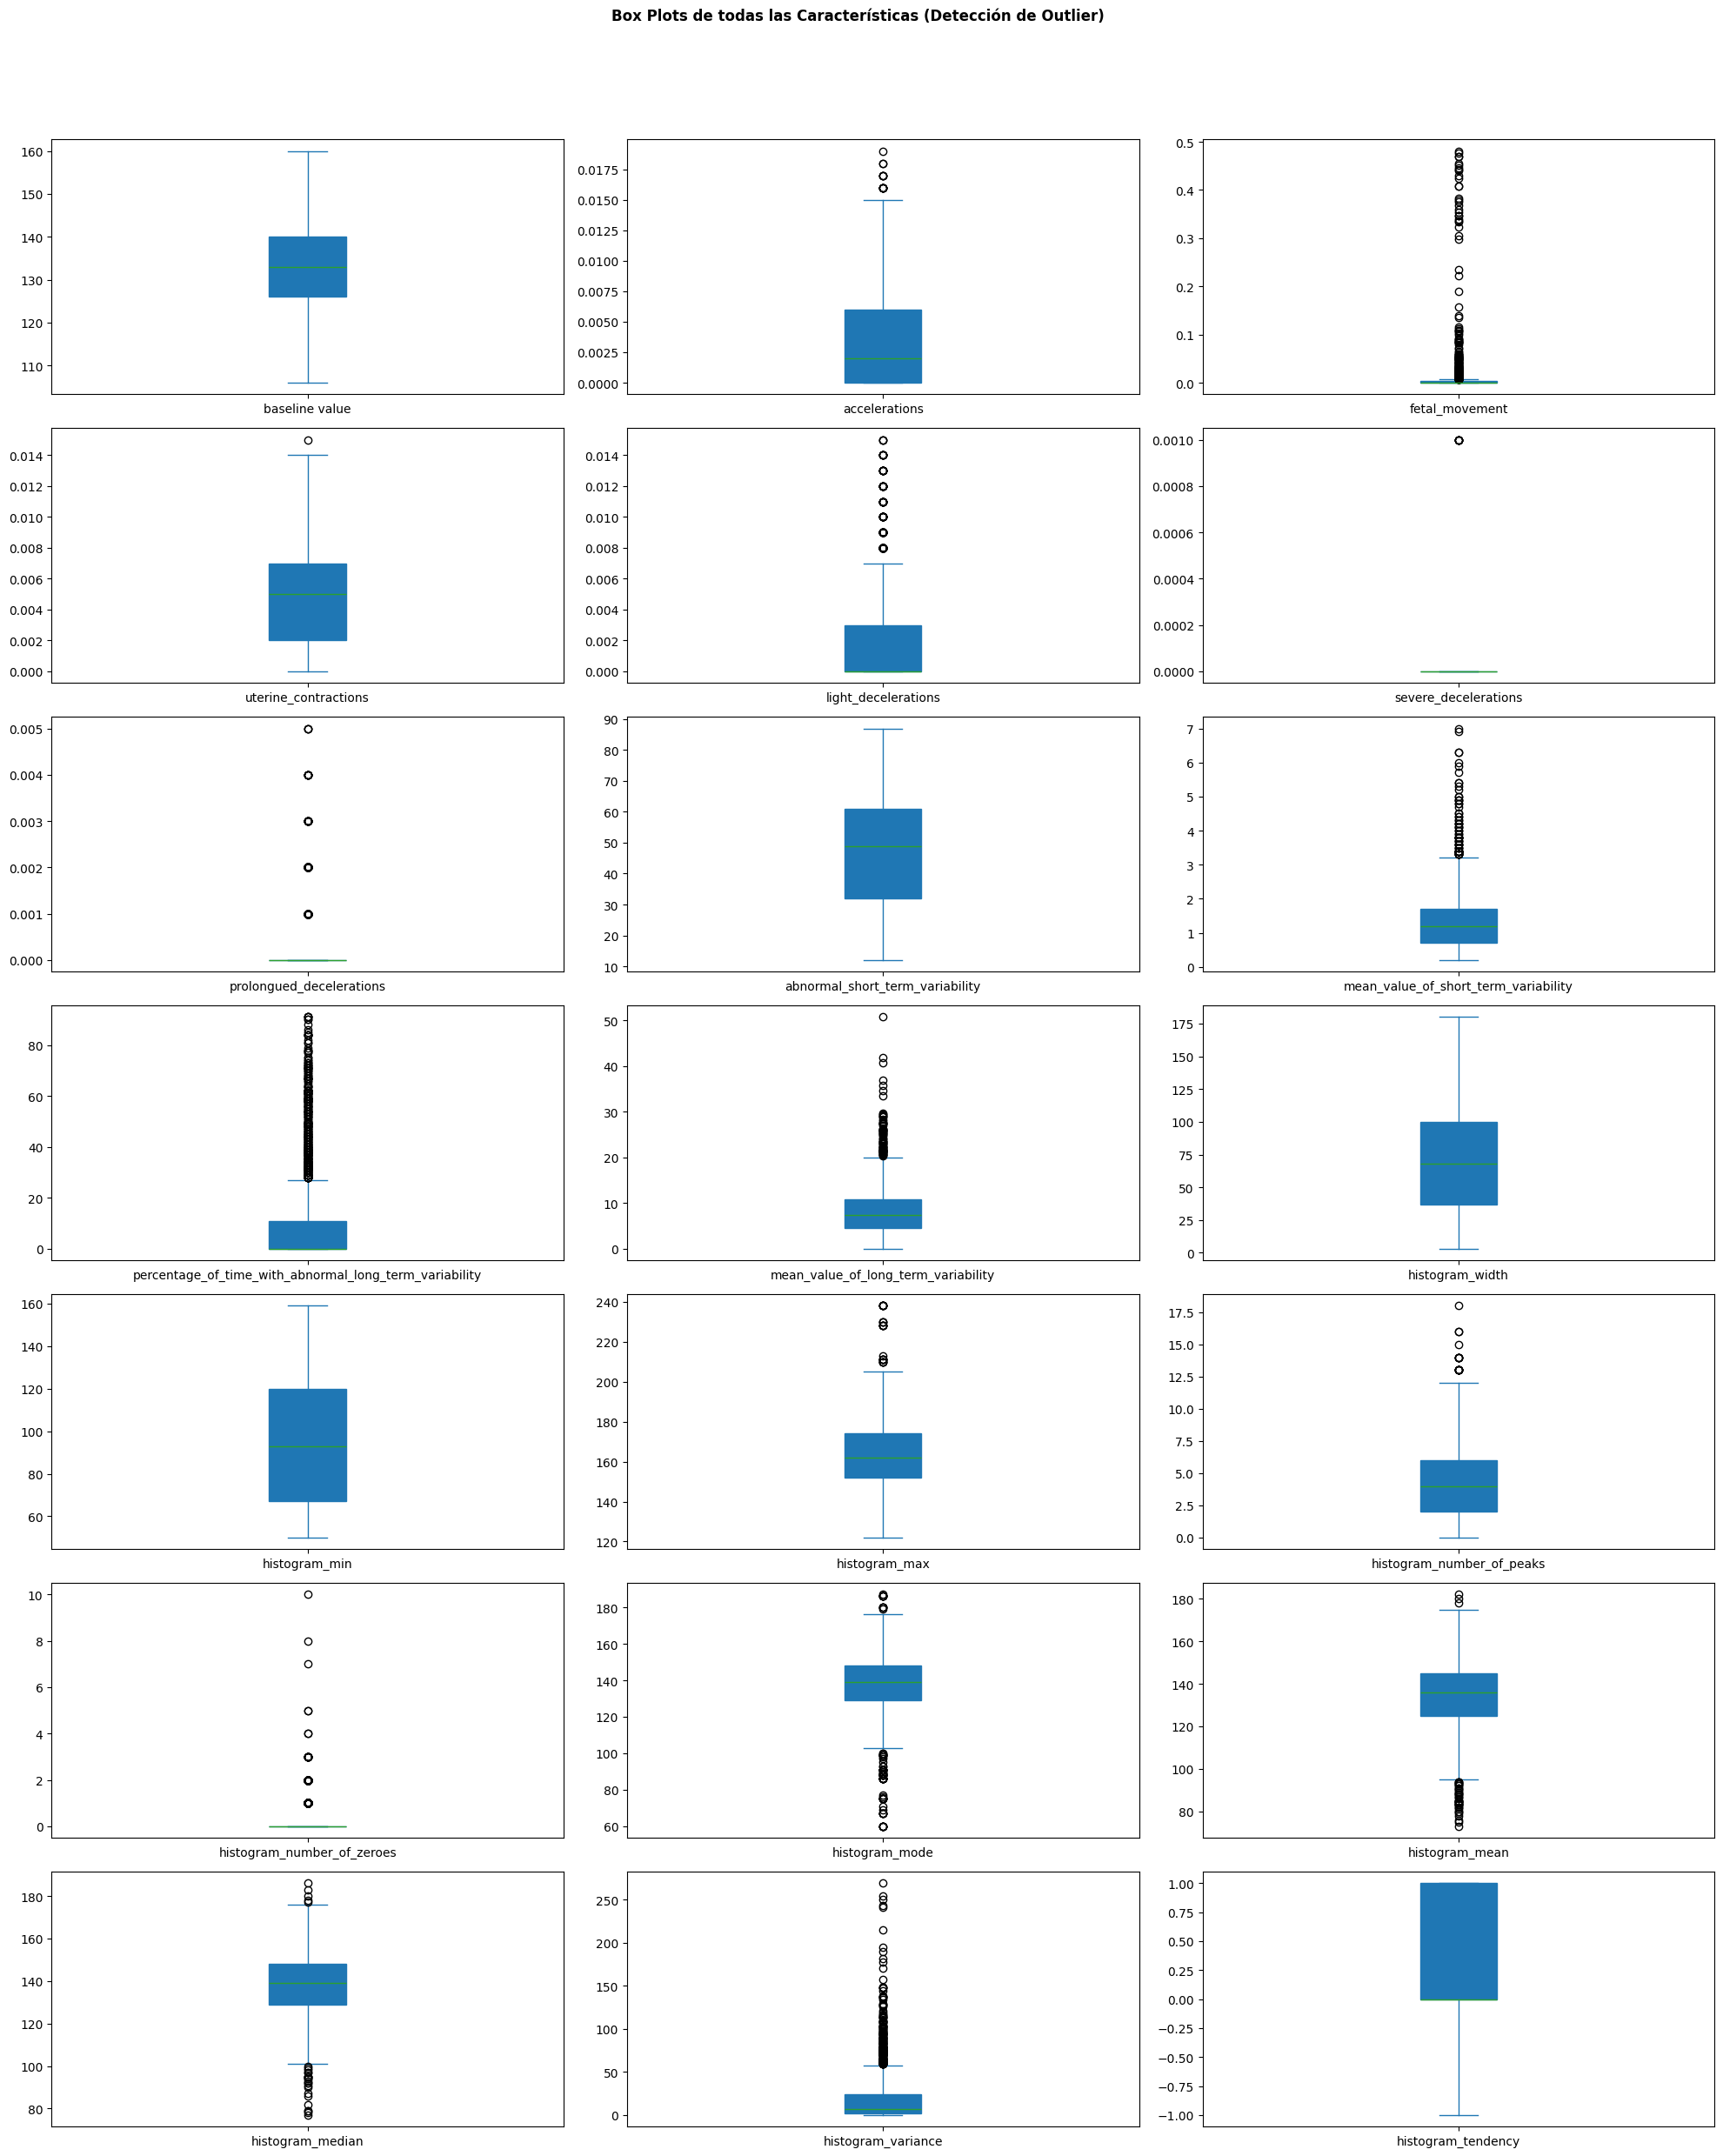

In [29]:
# Box Plots para Detección de Outliers
plt.Figure(figsize=(20, 25))
features.plot(kind='box', subplots=True, layout=(7, 3), figsize=(20, 25), sharex=False, sharey=False, patch_artist=True)
plt.suptitle('Box Plots de todas las Características (Detección de Outlier)', y=1.02, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('feature_boxplot.png', bbox_inches='tight')

### Hallazgos del Análisis Univariante
fetal_health_distribution.png (Gráfico de Barras): Confirma visualmente el fuerte desbalance de clases. La clase 1.0 (Normal) domina el dataset, lo cual es un punto crítico para el futuro entrenamiento de modelos de machine learning (se podrían necesitar técnicas como SMOTE o ajuste de pesos de clase).

feature_histograms.png (Histogramas): Esta cuadrícula nos muestra la "forma" de los datos de cada característica.

    Variables como baseline value o histogram_mean se asemejan a una distribución normal (simétrica).

    Muchas otras, como fetal_movement, severe_decelerations, y prolongued_decelerations, están fuertemente sesgadas a la derecha. La mayoría de sus valores son 0, lo cual tiene sentido clínico (afortunadamente, las desaceleraciones severas no son comunes).

feature_boxplots.png (Box Plots): Este es nuestro análisis de outliers. Los puntos fuera de los "bigotes" de los diagramas de caja son valores atípicos.

    Se puede ver que casi todas las variables tienen outliers.

    Variables como fetal_movement, histogram_variance y mean_value_of_long_term_variability destacan por tener una gran cantidad de estos valores atípicos. Esto es muy común en datos médicos y no significa que debamos eliminarlos, sino ser conscientes de ellos.

## Análisis Bivariante y de Correlación

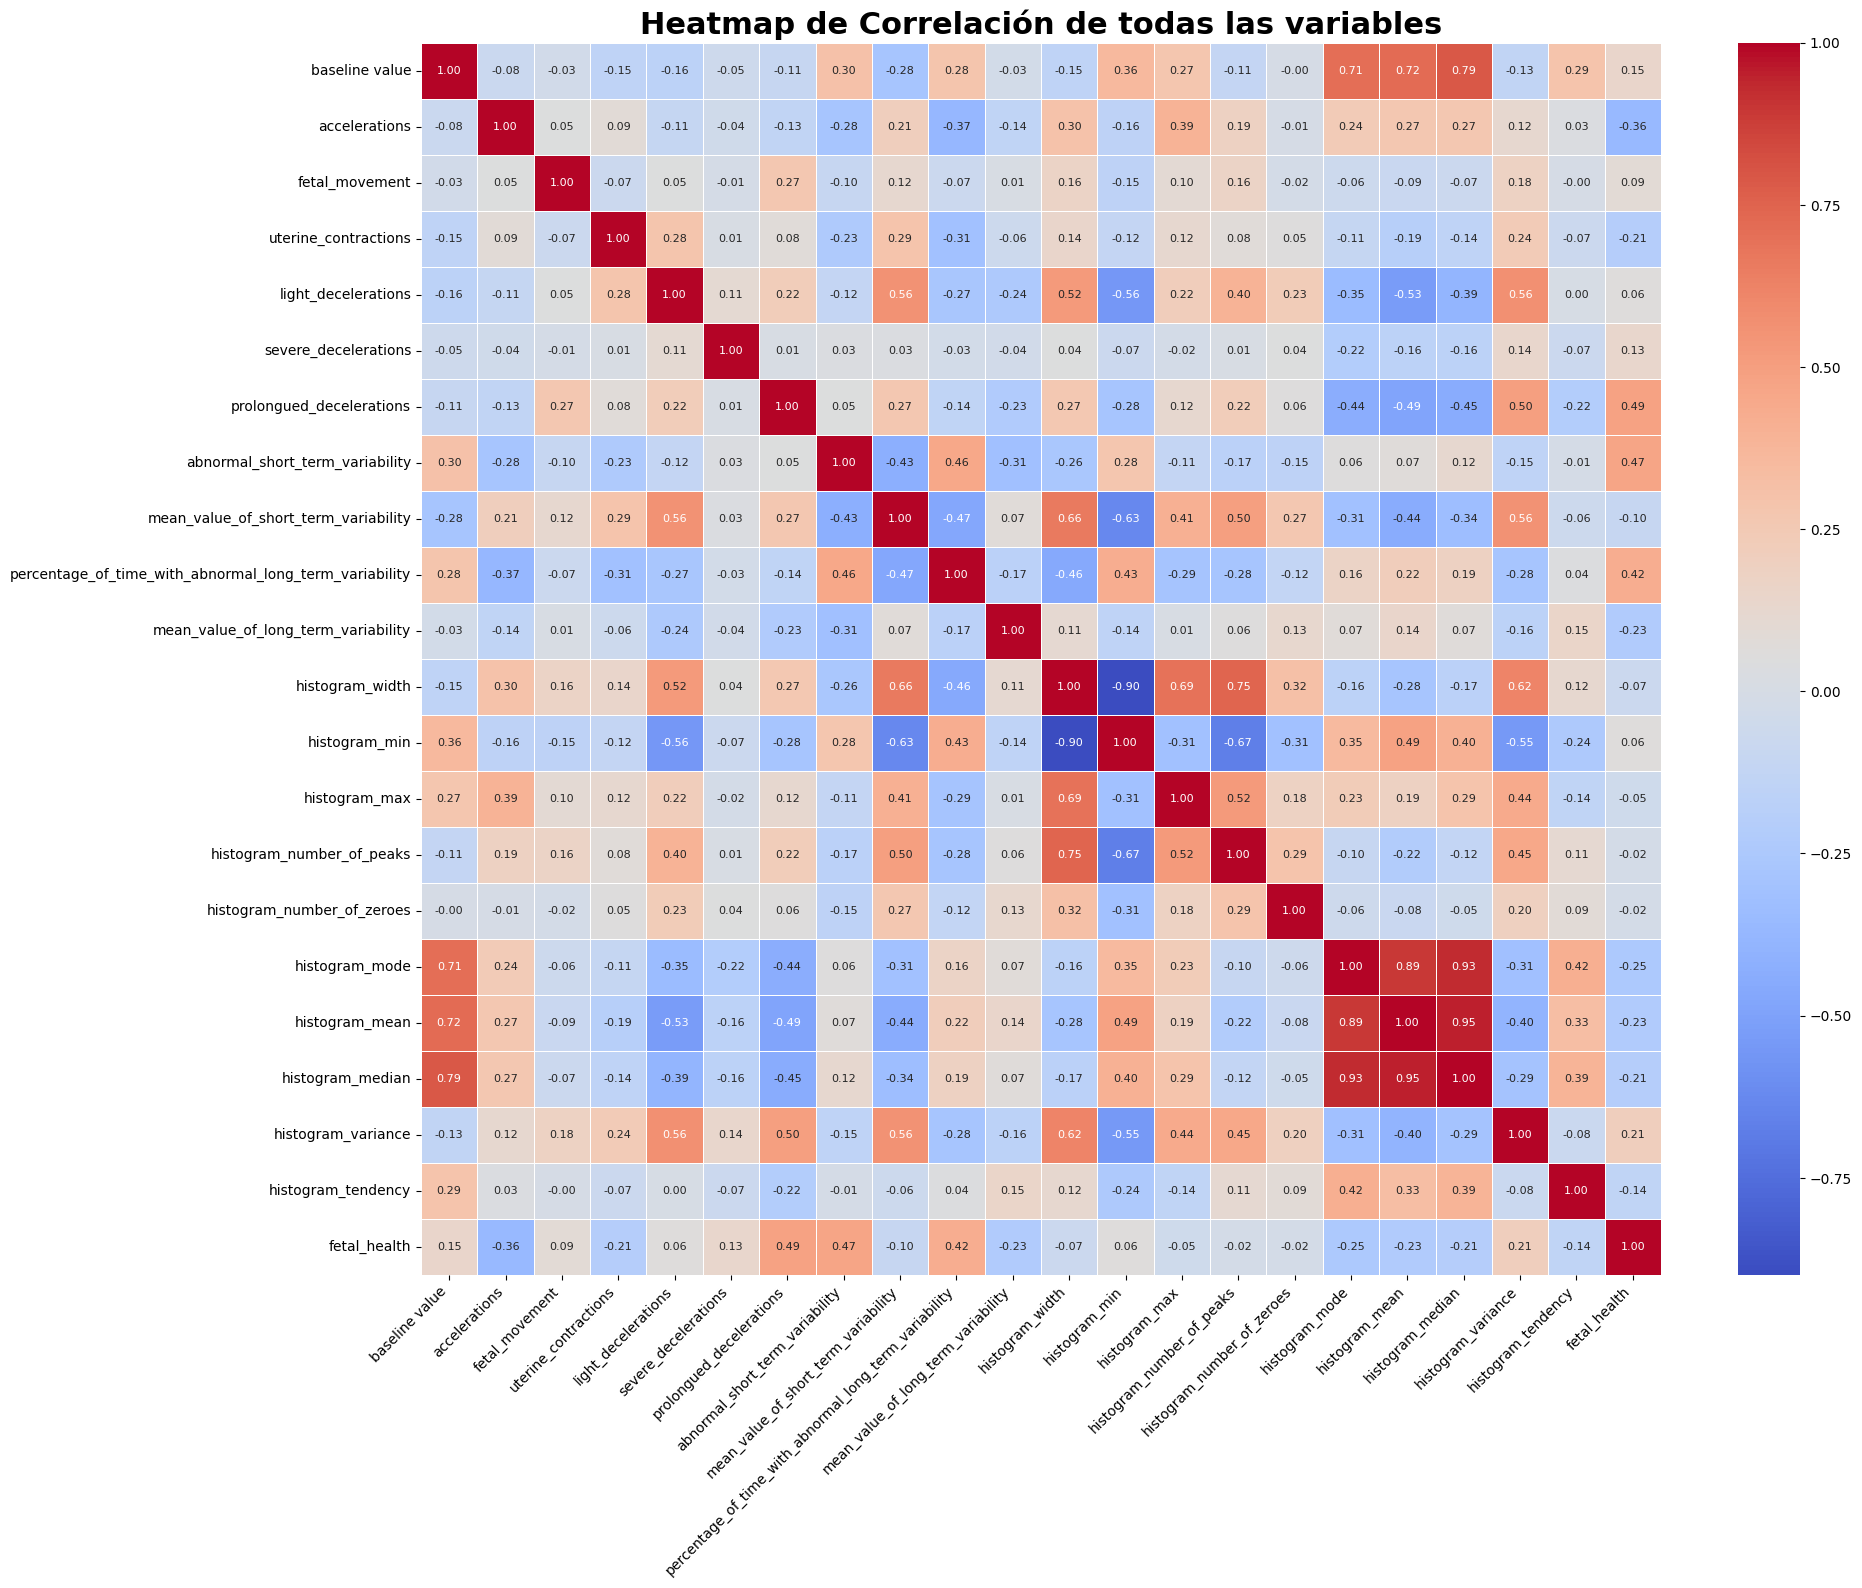

In [31]:
# --- Matriz de Correlación y Heatmap
plt.figure(figsize=(20, 16))
    # Nos aseguramos que 'fetal_health' es numérico para la correlación
df['fetal_health'] = pd.to_numeric(df['fetal_health'])
corr_matrix = df.corr()

# Dibujar el heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Heatmap de Correlación de todas las variables', fontsize=22, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.savefig('correlation_heatmap.png', bbox_inches='tight')


--- Las 5 características más correlacionadas con 'fetal_health son: ---
prolongued_decelerations                                  0.486752
abnormal_short_term_variability                           0.469671
percentage_of_time_with_abnormal_long_term_variability    0.421634
accelerations                                             0.363947
histogram_mode                                            0.253612
Name: fetal_health, dtype: float64
-----------------------------------------------------------------


/tmp/ipykernel_74795/80441803.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=feature, data=df, palette='viridis')
/tmp/ipykernel_74795/80441803.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=feature, data=df, palette='viridis')
/tmp/ipykernel_74795/80441803.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=feature, data=df, palette='viridis')
/tmp/ipykernel_74795/80441803.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

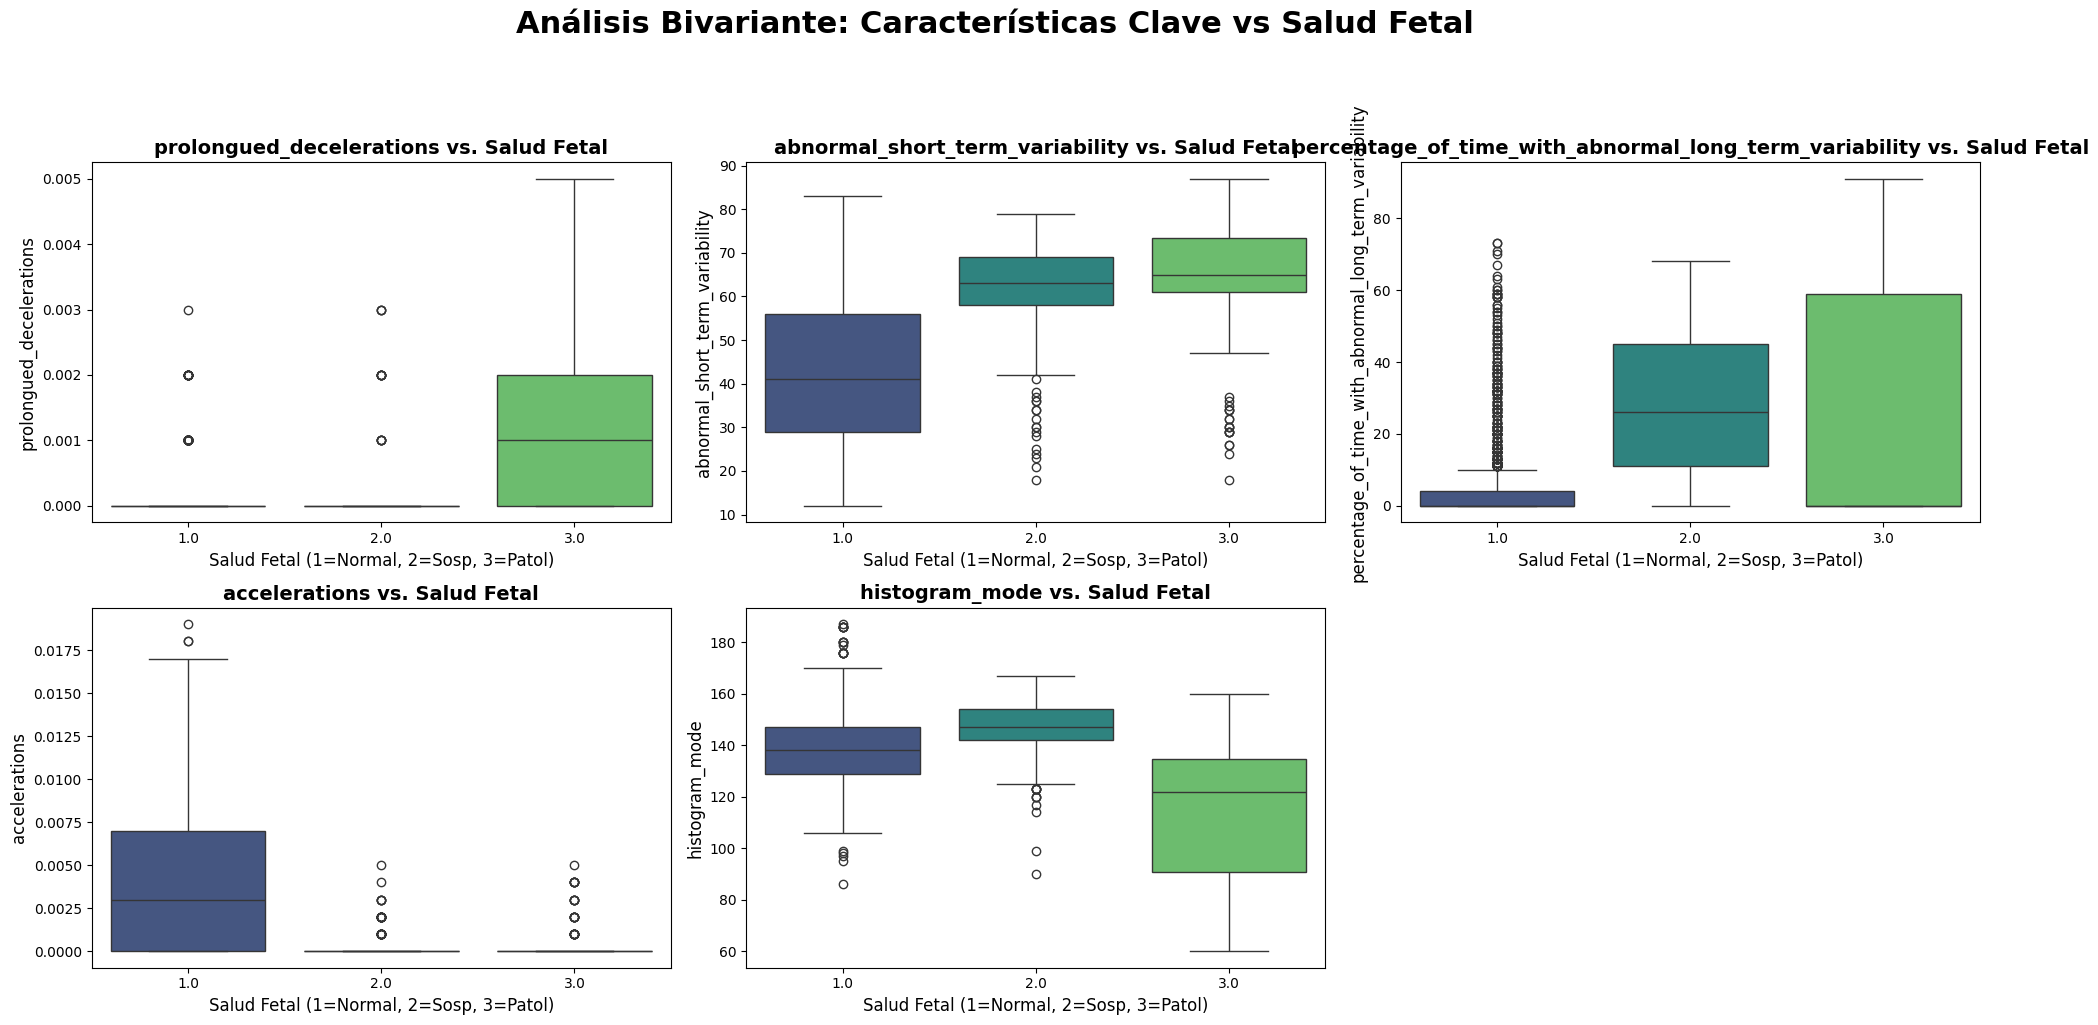

In [32]:
# --- Bivariate Analysis (Feature vs. Target)

# Econtrar las variables MÁS correlacionadas don 'fetal_health'
# Usamos .abs() para obtener la magnitud de la correlación (positiva o negativa)
corr_target = corr_matrix['fetal_health'].abs().sort_values(ascending=False)

# Quitamos 'fetal_health' de la lista (correlación 1.0 consigo misma)
top_feature = corr_target[1:6]
print(f"--- Las 5 características más correlacionadas con 'fetal_health son: ---")
print(top_feature)
print("-----------------------------------------------------------------")

# Creamos box plot para estas 5 características, agrupadas por 'fetal_health'
# Convertir 'fetal_health' de nuevo a categórico para el plotting
df['fetal_health'] = df['fetal_health'].astype('category')

plt.figure(figsize=(20, 10))
# Crear subplots
for i, feature in enumerate(top_feature.index):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='fetal_health', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} vs. Salud Fetal', fontsize=14, weight='bold')
    plt.xlabel('Salud Fetal (1=Normal, 2=Sosp, 3=Patol)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    
plt.suptitle('Análisis Bivariante: Características Clave vs Salud Fetal', size=22, weight='bold', y=1.05)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('bivariate_boxplots.png', bbox_inches='tight')

## Hallazgo de Análisis Bivariante y de Correlación
(Heatmap de Correlación)

Este mapa de calor nos muestra la correlación de Pearson entre todas las variables.

    Correlación con el Objetivo: Si miras la última fila (fetal_health), puedes ver qué variables tienen los colores más intensos (rojo para positivo, azul para negativo). Esto nos dice qué características están más ligadas al diagnóstico.

    Multicolinealidad: También revela correlaciones fuertes entre las propias características. Por ejemplo, histogram_mean, histogram_mode, y histogram_median están extremadamente correlacionadas entre sí (valores > 0.9). Esto es un signo de multicolinealidad y es importante tenerlo en cuenta para el modelado, ya que podríamos querer eliminar algunas de estas variables redundantes.

(Box Plots Bivariantes)

Este es el análisis más revelador. El código identificó automáticamente las 5 características más correlacionadas con la salud fetal y las graficó contra las 3 clases:

    prolongued_decelerations (Desaceleraciones Prolongadas): Hay una tendencia clarísima. Los fetos 'Normales' (1.0) tienen valores en o cerca de cero, mientras que los 'Patológicos' (3.0) tienen valores notablemente más altos y una distribución más amplia.

    abnormal_short_term_variability (Variabilidad Anormal a Corto Plazo): Se ve el mismo patrón. A medida que la salud fetal empeora (de 1.0 a 3.0), el valor de esta variabilidad anormal aumenta.

    percentage_of_time_with_abnormal_long_term_variability (Tiempo con Variabilidad Anormal a Largo Plazo): Exactamente la misma tendencia que la anterior. Aumenta con la gravedad del diagnóstico.

    accelerations (Aceleraciones): Aquí vemos la relación inversa (correlación negativa). Las aceleraciones son buenas. Los fetos 'Normales' (1.0) tienen más aceleraciones, y este valor disminuye a medida que el feto se vuelve 'Sospechoso' (2.0) o 'Patológico' (3.0).

    histogram_mode (Moda del Histograma): También muestra una tendencia. La moda de la frecuencia cardíaca (el valor más común) tiende a ser menor en los fetos patológicos.

## Conclusión EDA
Datos: El dataset está limpio, sin valores nulos, aunque contenía 13 duplicados que hemos eliminado.

Balance: El problema principal es el fuerte desbalance de clases, con la clase 'Normal' (1.0) siendo mayoritaria.

Outliers: Detectamos numerosos outliers en casi todas las variables. Dado el contexto médico, es probable que sean valores extremos pero clínicamente relevantes, no errores.

Predictores Clave: Hemos identificado un conjunto de variables predictoras muy potentes. El diagnóstico de fetal_health está fuertemente relacionado con:

    La presencia de desaceleraciones prolongadas.

    La variabilidad anormal (tanto a corto como a largo plazo).

    La ausencia de aceleraciones.